In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from load_utils import *
from analysis_utils import *
from collections import OrderedDict

In [2]:
sns.set(font_scale=2)

### Load and Group Data

In [3]:
d = load_diffs(keep_diff=True)
df_events, df_blocked_user_text = load_block_events_and_users()

In [7]:
# The equal error threshold
threshold = 0.408

In [8]:
d['2015']['is_attack'] = (d['2015']['pred_attack_score_uncalibrated'] > threshold)

In [9]:
agg_dict = OrderedDict([('is_attack', ['count','sum']), ('user_id', 'first'), ('author_anon', 'first')])
df_a = d['2015'].groupby('user_text', as_index = False).agg(agg_dict)

In [10]:
df_a.columns = ['user_text', 'total', 'attacks', 'user_id', 'author_anon']

### Helper Functions

In [13]:
def make_histogram(data, weights, bins, bin_labels, ylabel, xlabel, percent = True):
    values, base = np.histogram(data, weights = weights, bins = bins)
    center = (base[:-1] + base[1:])/2
    if percent:
        frac_values = 100*values/np.sum(values)
    else:
        frac_values = values
    y_range = range(len(values))
    plt.bar(y_range, frac_values, align = 'center')
    plt.xticks(y_range, bin_labels)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [20]:
def make_split_histogram(data_1, data_2, weights_1, weights_2, bins, bin_labels, legend_labels, ylabel, xlabel):
    reg_values, _ = np.histogram(data_1, weights = weights_1, bins = bins)
    anon_values, _ = np.histogram(data_2, weights = weights_2, bins = bins)
    total_values = np.sum(reg_values) + np.sum(anon_values)
    frac_reg = 100.0*reg_values/total_values
    frac_anon = 100.0*anon_values/total_values
    y_range = range(len(reg_values))
    p_reg = plt.bar(y_range, frac_reg, align = 'center', color = 'orange')
    p_anon = plt.bar(y_range, frac_anon, align = 'center', bottom=frac_reg)
    plt.xticks(y_range, bin_labels)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend((p_reg[0],p_anon[0]),legend_labels, loc = 0)

### Distribution of Attacking Comments

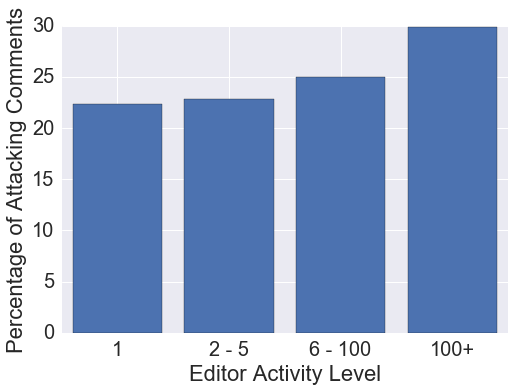

In [15]:
bins = [1, 2, 6, 101, 10000]
bin_labels = ['1', '2 - 5', '6 - 100', '100+']
ylabel = 'Percentage of Attacking Comments'
xlabel = 'Editor Activity Level'
make_histogram(df_a[['total']], df_a[['attacks']], bins, bin_labels, ylabel, xlabel)

### Split by Anonymity

In [16]:
df_anon = df_a.query('author_anon')
df_registered = df_a.query('not author_anon')
bins = [1, 2, 6, 101, 10000]
bin_labels = ['1', '2 - 5', '6 - 100', '100+']
legend_labels = ('Registered','Anonymous')
ylabel = 'Percentage of Attacking Comments'
xlabel = 'Editor Activity Level'

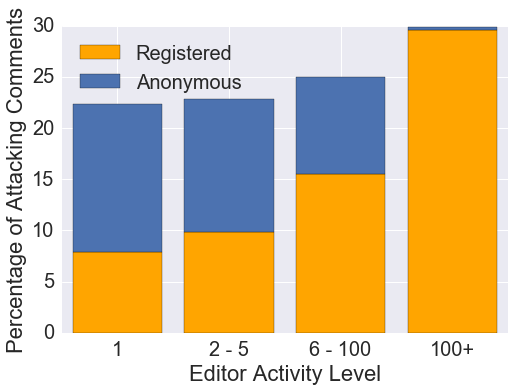

In [21]:
make_split_histogram(df_registered[['total']], df_anon[['total']], df_registered[['attacks']], df_anon[['attacks']], bins, bin_labels, legend_labels, ylabel, xlabel)

### Distribution of All Comments

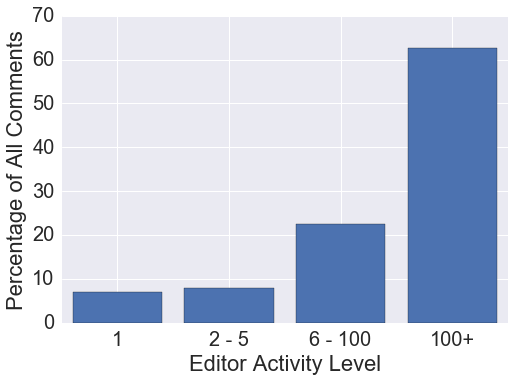

In [22]:
bins = [1, 2, 6, 101, 10000]
bin_labels = ['1', '2 - 5', '6 - 100', '100+']
ylabel = 'Percentage of All Comments'
xlabel = 'Editor Activity Level'
make_histogram(df_a[['total']], df_a[['total']], bins, bin_labels, ylabel, xlabel)

### Percent of Attacks vs. Toxicity Level

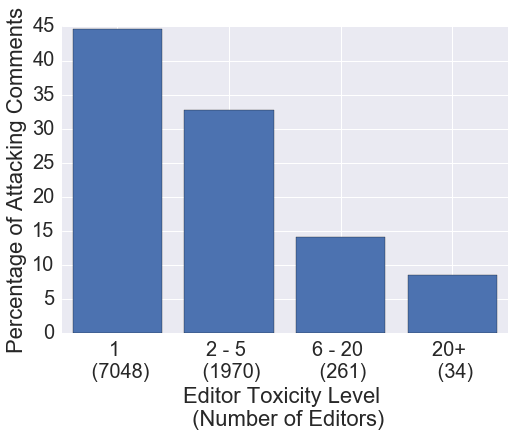

In [23]:
bins = [1, 2, 6, 21, 10000]
bin_labels = ['1 \n (7048)', '2 - 5 \n (1970)', '6 - 20 \n (261)','20+ \n (34)']
ylabel = 'Percentage of Attacking Comments'
xlabel = 'Editor Toxicity Level \n (Number of Editors)'
make_histogram(df_a[['attacks']], df_a[['attacks']], bins, bin_labels, ylabel, xlabel)

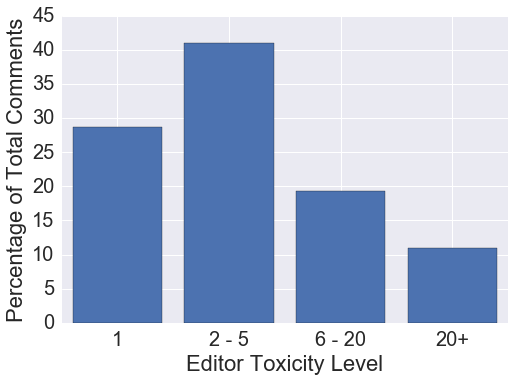

In [24]:
bins = [1, 2, 6, 21, 10000]
bin_labels = ['1', '2 - 5', '6 - 20','20+']
ylabel = 'Percentage of Total Comments'
xlabel = 'Editor Toxicity Level'
make_histogram(df_a[['attacks']], df_a[['total']], bins, bin_labels, ylabel, xlabel)

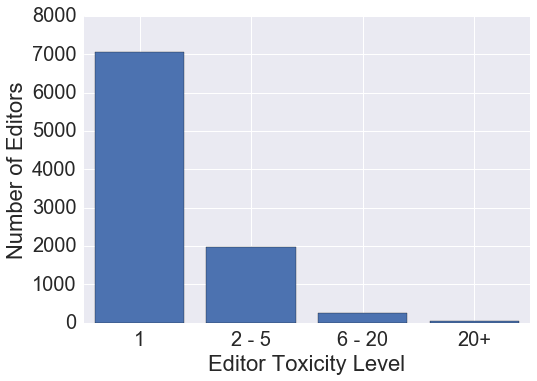

In [25]:
bins = [1, 2, 6, 21, 10000]
bin_labels = ['1', '2 - 5', '6 - 20','20+']
ylabel = 'Number of Editors'
xlabel = 'Editor Toxicity Level'
make_histogram(df_a[['attacks']], None, bins, bin_labels, ylabel, xlabel, percent=False)